# Feature selection

## Normalized data from the original article

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('./all_new_features_hier_norm.csv')

In [43]:
df.describe()

,Mobilnet_v1,Inception_v4,Resnet_v_152,kpSurf,brightnessAverageToPerceived,contrast,area_by_perim,aspect_ratio,edge_count,hue2
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,0.707474,0.707474,0.707474,-0.368159,-0.368159,-0.368159,-0.368159,-0.368159,2.208956,-0.368159
std,0.454927,0.454927,0.454927,0.000344,0.000344,0.000344,0.000344,0.000344,1.143359,0.000344
min,0.000000,0.000000,0.000000,-0.368590,-0.369215,-0.369080,-0.368221,-0.368307,-0.358523,-0.368162
25%,0.000000,0.000000,0.000000,-0.368410,-0.368345,-0.368368,-0.368213,-0.368278,1.337856,-0.368162
50%,1.000000,1.000000,1.000000,-0.368247,-0.368146,-0.368091,-0.368210,-0.368233,2.098800,-0.368162
75%,1.000000,1.000000,1.000000,-0.367917,-0.367965,-0.367901,-0.368207,-0.368134,3.003260,-0.368162
max,1.000000,1.000000,1.000000,-0.351625,-0.366946,-0.367435,-0.360699,-0.340277,7.733435,-0.312518


In [44]:
feat_df = df.iloc[:, 4:]
feat_df.drop(['edge_count','hue2'], axis=1, inplace=True)

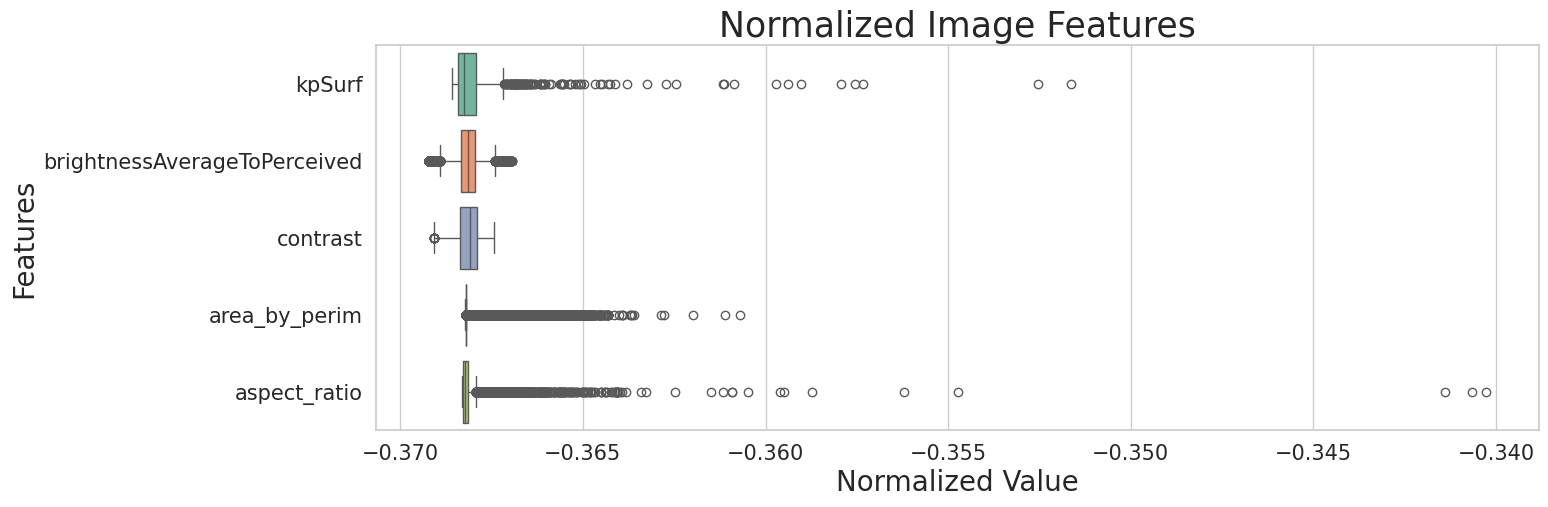

In [45]:

# plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=feat_df, orient="h", palette="Set2")
plt.xlabel('Normalized Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normalized Image Features', fontsize=25)
plt.show()


In [46]:
feat_df = df.iloc[:, 4:]

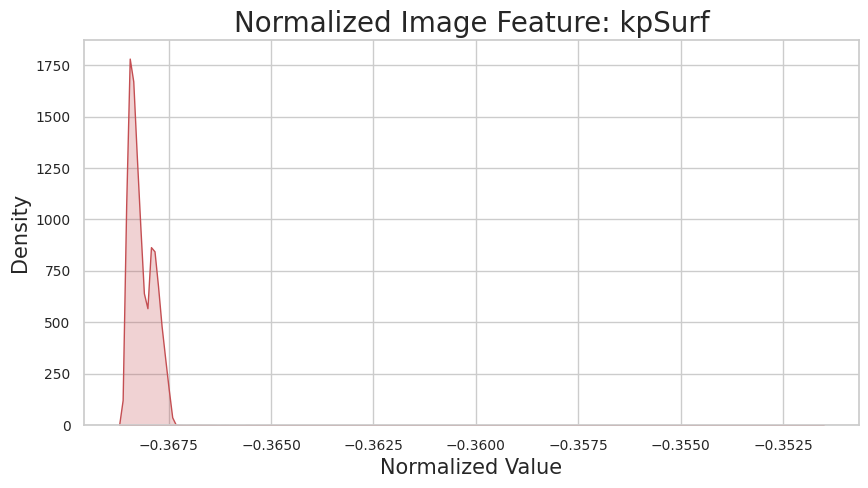

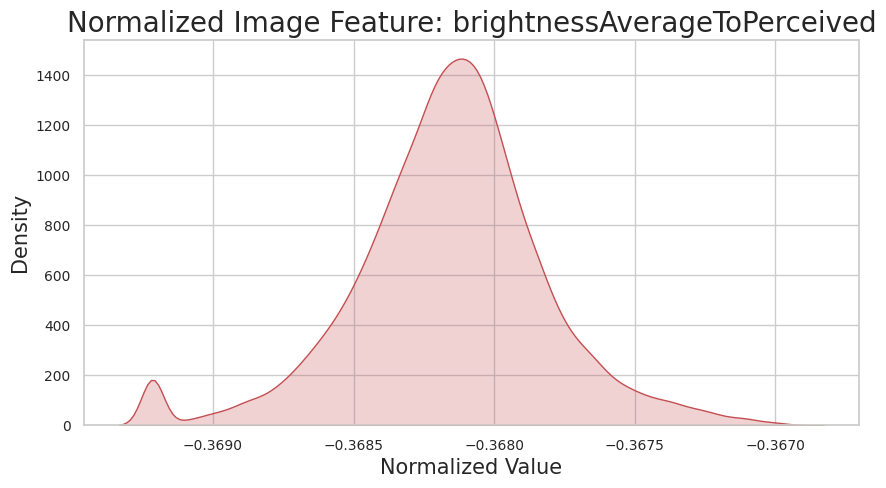

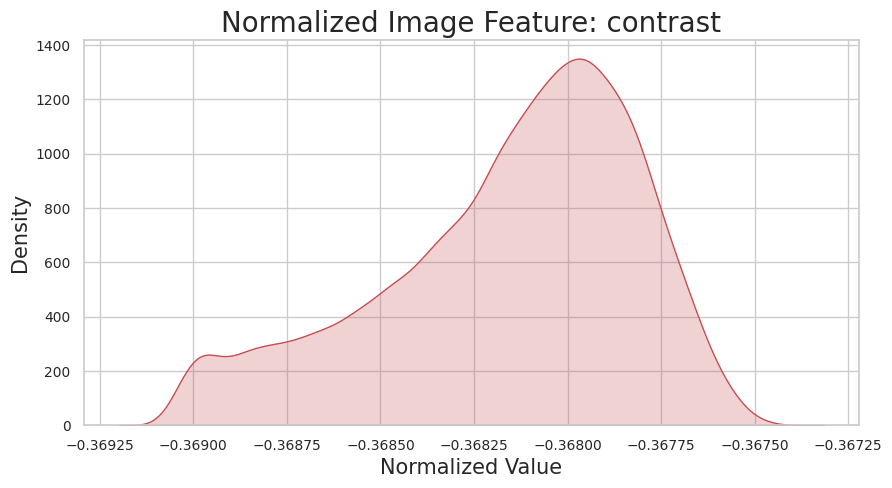

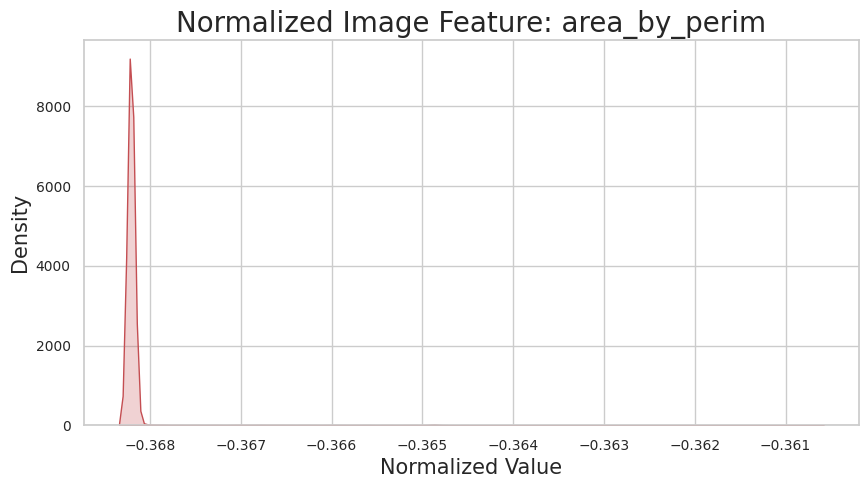

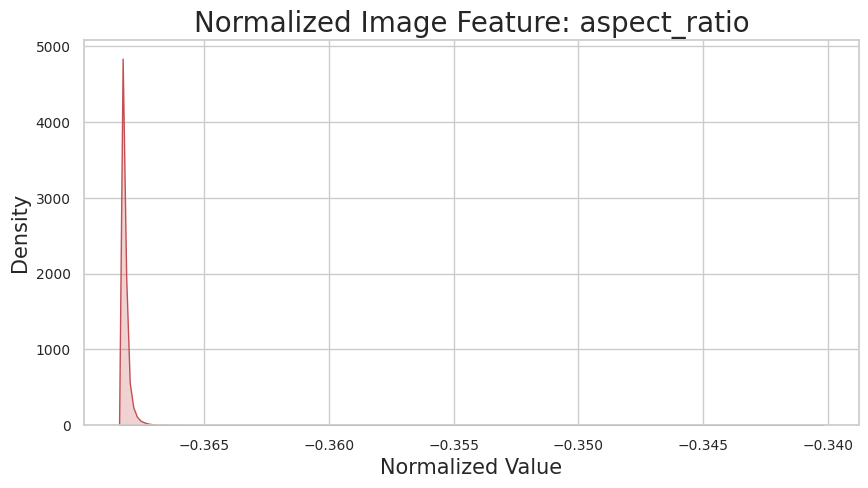

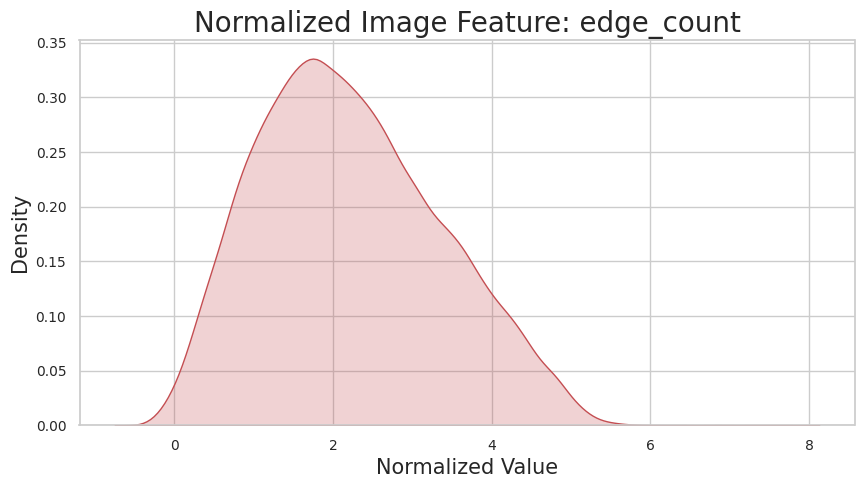

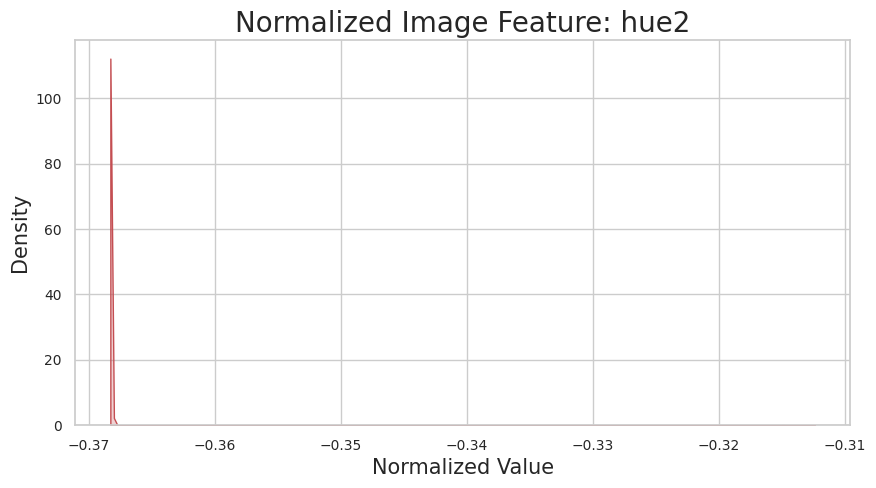

In [47]:
# plot kde plot for each feature separately
for col in feat_df.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))
    ax = sns.kdeplot(feat_df[col], fill=True, color="r")
    plt.xlabel('Normalized Value', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Normalized Image Feature: '+col, fontsize=20)
    plt.show()


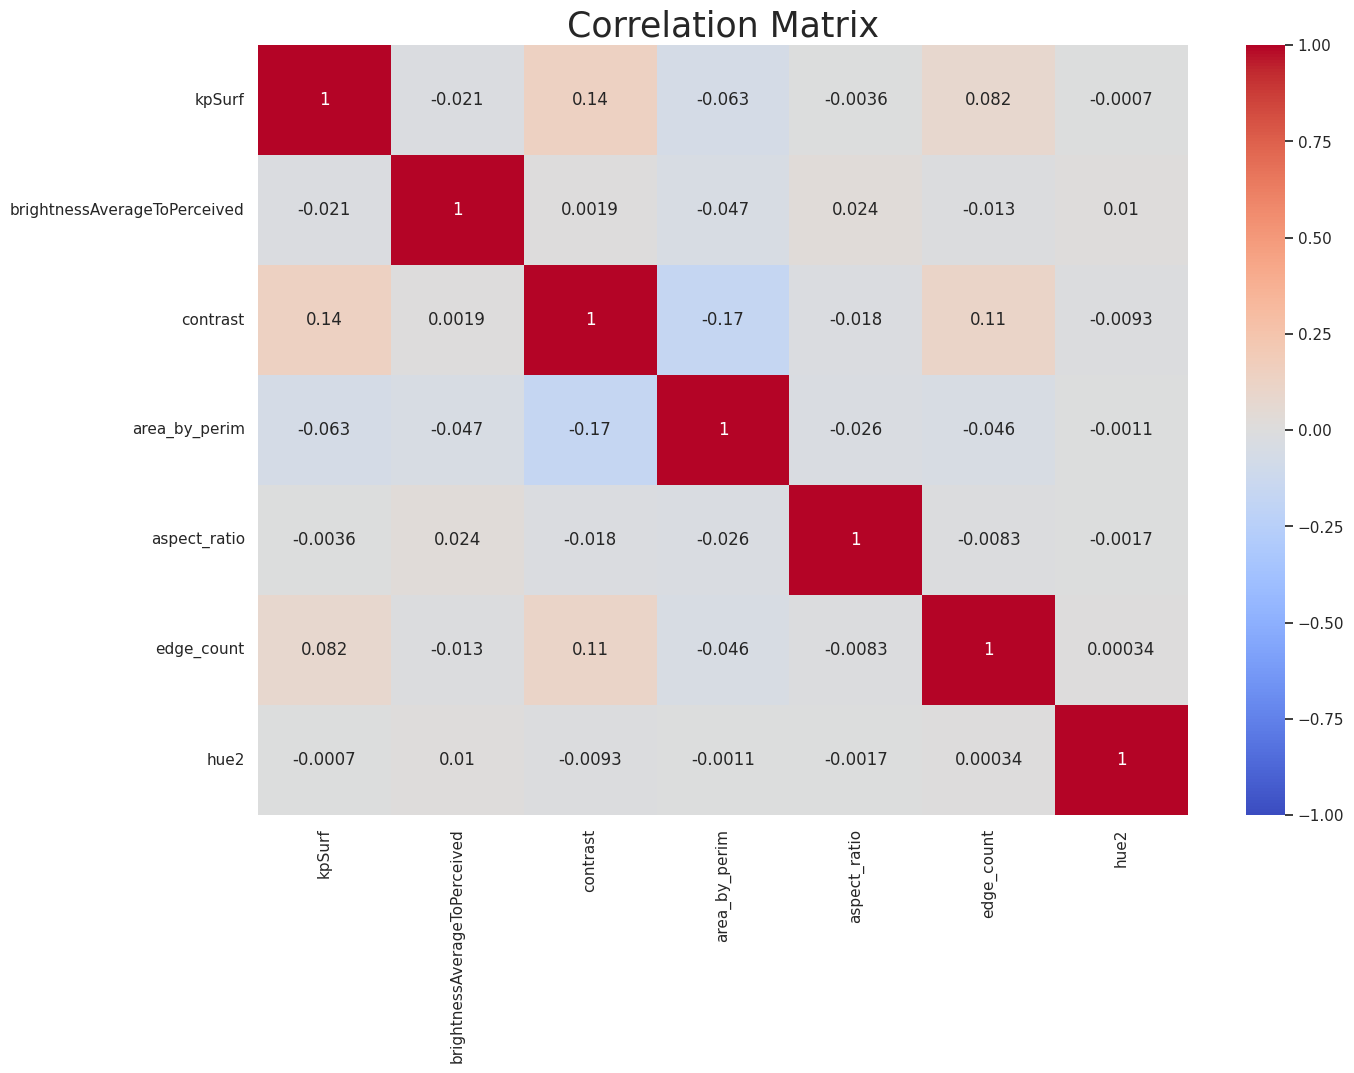

In [48]:
# plot correlation matrix
corr = feat_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=25)
plt.show()


## Our feature analysis

### Image features

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read csv file
df = pd.read_csv('./ilsvrc2012_features.csv')
df = df.drop(['filename'], axis=1)


In [50]:
df.describe()

,n_keypoints,avg_brightness,brightness_rms,avg_perc_brightness,perc_brightness_rms,contrast,edge_length1,edge_length2,edge_length3,edge_length4,...,edge_angle7,area_by_perim,aspect_ratio,hue1,hue2,hue3,hue4,hue5,hue6,hue7
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,485.771620,115.107250,130.116147,111.716637,127.017640,57.404923,77.352800,20.465880,7.007300,3.033820,...,2822.700500,109.188207,1.182530,1.051238e+05,4.200259e+04,1.231203e+04,1.832423e+04,3.432365e+04,6.098710e+03,1.314083e+04
std,52.998902,34.350709,32.031451,35.104237,33.109882,15.207162,138.214465,22.928528,7.400015,3.404507,...,3547.050801,39.846500,0.294588,2.111869e+05,1.082970e+05,4.804647e+04,6.387175e+04,9.582261e+04,2.004824e+04,4.336155e+04
min,0.000000,2.343269,6.679408,1.859532,5.120677,3.907879,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.254023,0.204268,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,500.000000,94.324464,110.925633,89.846554,106.601718,47.104187,25.000000,7.000000,2.000000,1.000000,...,1073.000000,100.039616,0.947467,4.009375e+04,6.780750e+03,1.056000e+03,9.320000e+02,2.575000e+03,5.350000e+02,1.569000e+03
50%,500.000000,115.090153,129.617127,111.319131,126.346575,57.225405,51.000000,14.000000,5.000000,2.000000,...,2083.000000,106.887743,1.333333,7.928600e+04,2.134550e+04,4.124000e+03,5.533500e+03,1.503400e+04,2.002500e+03,5.206000e+03
75%,500.000000,134.481658,148.031772,131.772039,145.951823,67.290331,96.000000,27.000000,9.000000,4.000000,...,3742.000000,109.459172,1.333333,1.322775e+05,5.019900e+04,1.169000e+04,1.828600e+04,4.258125e+04,5.742000e+03,1.353500e+04
max,501.000000,245.673187,248.496150,245.673187,248.552622,119.675725,7598.000000,1168.000000,191.000000,203.000000,...,201810.000000,1054.432882,5.862595,8.739332e+06,1.012473e+07,5.254598e+06,5.647905e+06,6.469506e+06,1.098698e+06,5.030874e+06


In [51]:
# skip edge and hue columns
not_edge_hue_colnames = [c for c in df.columns if 'edge' not in c and 'hue' not in c]
feat_df = df[not_edge_hue_colnames]


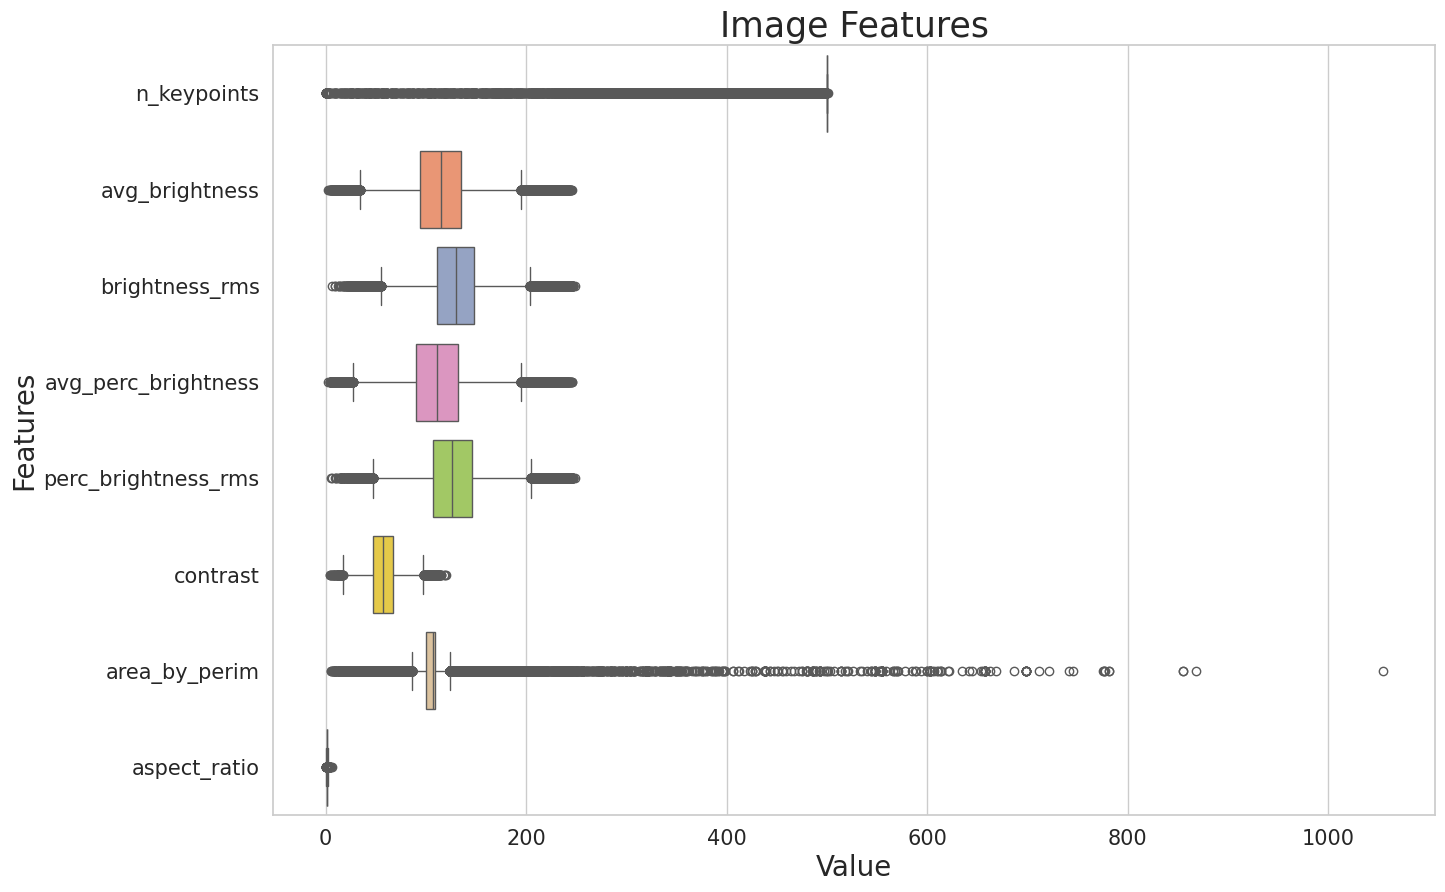

In [52]:
# plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=feat_df, orient="h", palette="Set2")
plt.xlabel('Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Image Features', fontsize=25)
plt.show()


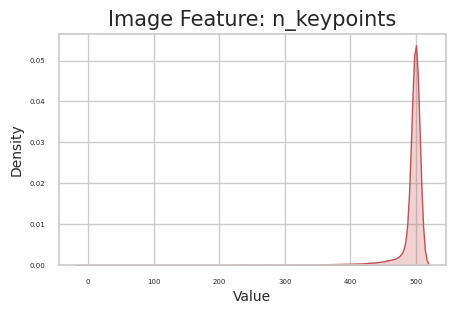

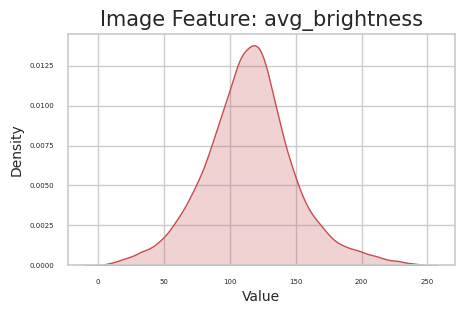

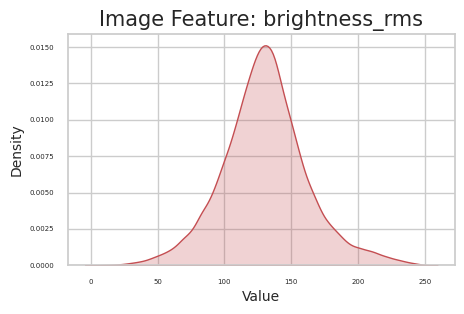

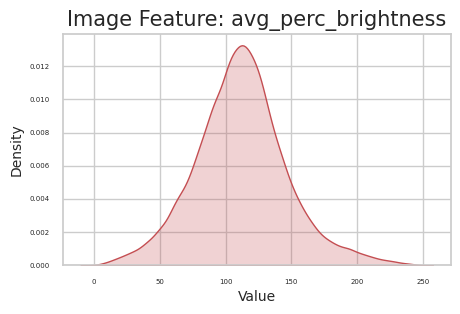

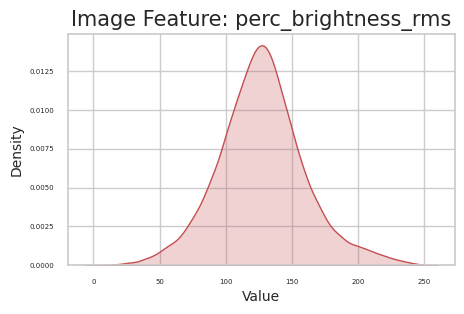

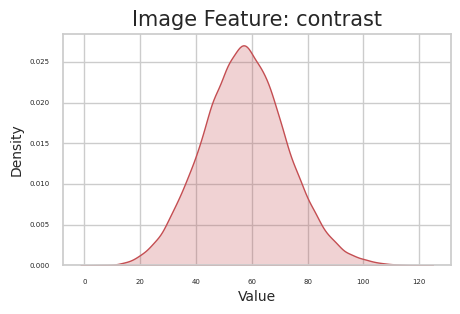

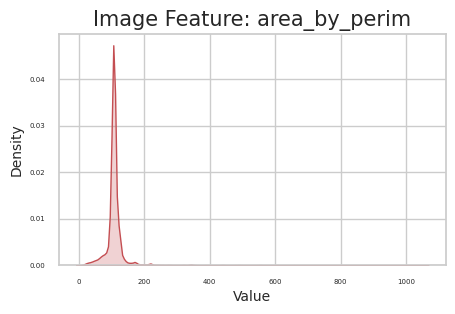

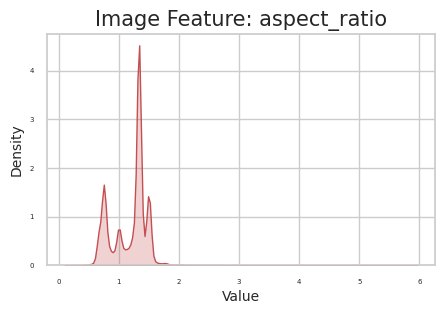

In [53]:
# plot kde plot for each feature separately
for col in feat_df.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 3))
    ax = sns.kdeplot(feat_df[col], fill=True, color="r")
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.title('Image Feature: '+col, fontsize=15)
    plt.show()


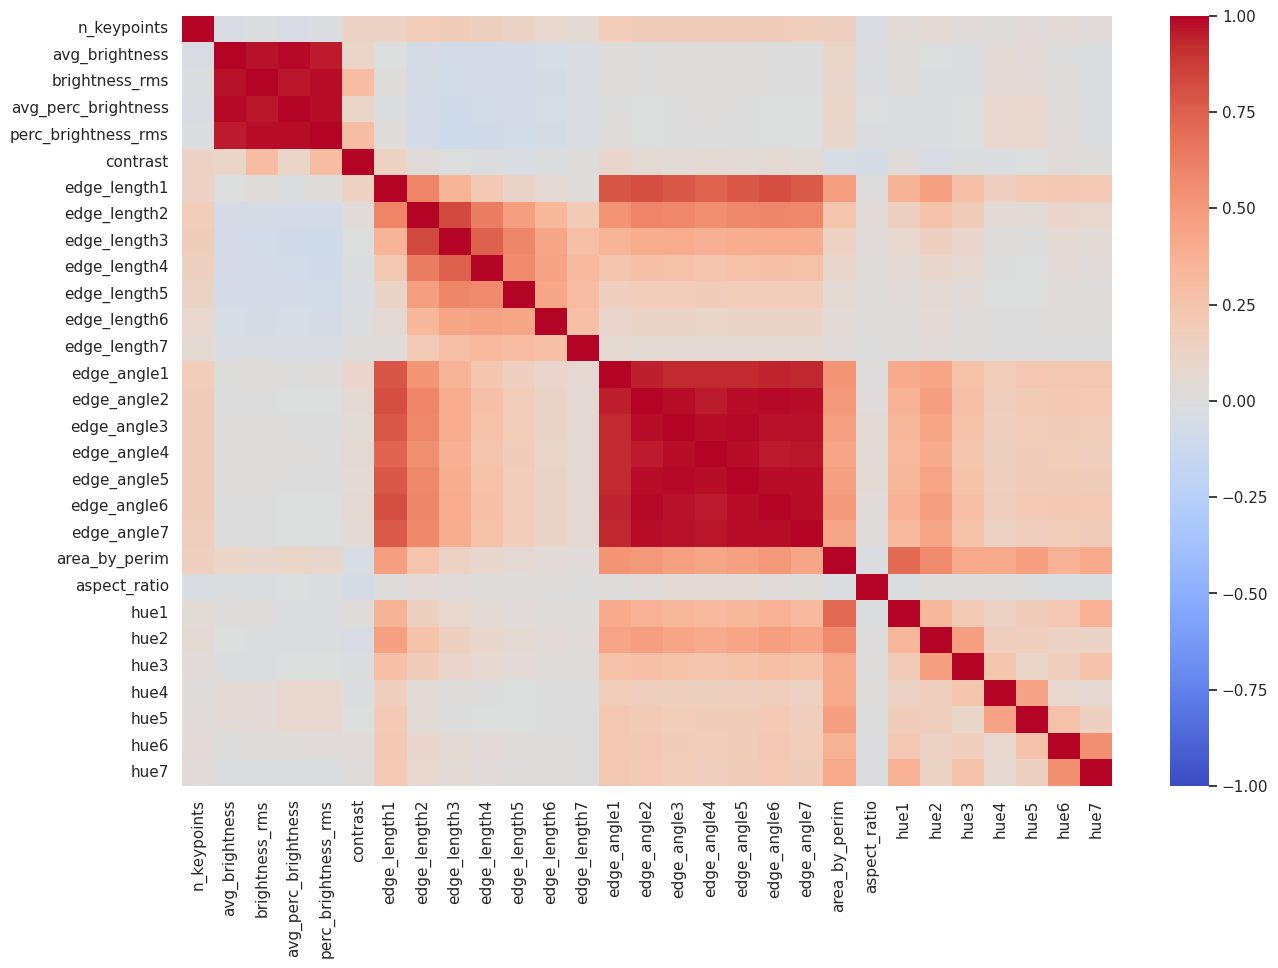

In [54]:
# plot correlation matrix without numbers
corr = df.corr(method='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix', fontsize=25)

# save image as pdf
plt.savefig('cv_corr_matrix.pdf', bbox_inches='tight')

plt.show()


In [55]:
print("Hue1 and Hue2 correlation: ", corr['hue1']['hue2'])
print("Edge angle 1 and Edge angle 2 correlation: ", corr['edge_angle1']['edge_angle2'])
print("Edge length 6 and Edge length 7 correlation: ", corr['edge_length6']['edge_length7'])
# avg_brightness , brightness_rms, avg_perc_brightness, perc_brightness_rms
print("Brightness correlation: ")
corr.iloc[1:5, 1:5]


Hue1 and Hue2 correlation:  0.339511142113526
Edge angle 1 and Edge angle 2 correlation:  0.9467658417109921
Edge length 6 and Edge length 7 correlation:  0.28240123009197815
Brightness correlation: 


,avg_brightness,brightness_rms,avg_perc_brightness,perc_brightness_rms
avg_brightness,1.000000,0.976545,0.984737,0.959318
brightness_rms,0.976545,1.000000,0.963253,0.983424
avg_perc_brightness,0.984737,0.963253,1.000000,0.977210
perc_brightness_rms,0.959318,0.983424,0.977210,1.000000


In [56]:
import pandas as pd
import numpy as np

def get_high_correlation_features(df):
    # Calculate the Pearson correlation matrix
    corr = df.corr(method='pearson')

    # Initialize a list to keep track of features already used as similar features
    used_features = set()

    # Prepare a list to store the result
    result = []

    # Iterate over the correlation matrix
    for feature in corr.columns:
        if feature not in used_features:
            # Find other features with high absolute correlation
            similar_features = corr[feature][corr[feature].abs() > 0.90].index.tolist()
            similar_features.remove(feature)  # Remove the feature itself

            # Update the used features set
            used_features.update(similar_features)

            # Get the correlation values
            correlations = [corr[feature][similar_feature] for similar_feature in similar_features]

            # Append to the result list if there are similar features
            if similar_features:
                for i in range(len(similar_features)):
                    result.append({
                        'Kept feature': feature,
                        'Removed feature': similar_features[i],
                        'Correl.': correlations[i]
                    })

    # Convert the result into a DataFrame
    result_df = pd.DataFrame(result)
    return result_df

high_corr_features = get_high_correlation_features(df)
print(high_corr_features)


     Kept feature      Removed feature   Correl.
0  avg_brightness       brightness_rms  0.976545
1  avg_brightness  avg_perc_brightness  0.984737
2  avg_brightness  perc_brightness_rms  0.959318
3     edge_angle1          edge_angle2  0.946766
4     edge_angle1          edge_angle3  0.923970
5     edge_angle1          edge_angle4  0.925575
6     edge_angle1          edge_angle5  0.921939
7     edge_angle1          edge_angle6  0.940627
8     edge_angle1          edge_angle7  0.937461


### Machine translation feature analysis

In [57]:
# load data
import pandas as pd
df = pd.read_csv('./wmt16_features.csv')
df.columns

Index(['n_words', 'n_bpe_chars', 'avg_bpe', 'n_tokens', 'avg_noun', 'avg_verb',
       'avg_adj', 'avg_sat_adj', 'avg_adverb', 'avg_punc',
       ...
       'bow_7754', 'bow_7755', 'bow_7756', 'bow_7757', 'bow_7758', 'bow_7759',
       'bow_7760', 'bow_7761', 'bow_7762', 'bow_7763'],
      dtype='object', length=7775)

In [58]:
bow_cols = [c for c in df.columns if 'bow' in c]
df_no_bow = df.drop(bow_cols, axis=1)
df_no_bow.describe()


,n_words,n_bpe_chars,avg_bpe,n_tokens,avg_noun,avg_verb,avg_adj,avg_sat_adj,avg_adverb,avg_punc,avg_word_length
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.450800,29.915800,1.200798,28.330200,0.192078,0.112812,0.075730,0.211030,0.050445,0.137869,4.828042
std,15.847038,18.610695,0.291240,17.484299,0.089894,0.060416,0.063432,0.095975,0.059223,0.156354,0.741983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,16.000000,1.100000,16.000000,0.137931,0.076923,0.029412,0.152174,0.000000,0.075472,4.406647
50%,22.000000,26.000000,1.153846,24.000000,0.187500,0.111111,0.071429,0.208333,0.038462,0.111111,4.823529
75%,33.000000,39.000000,1.230769,37.000000,0.243902,0.142857,0.111111,0.266667,0.076923,0.156250,5.222222
max,127.000000,160.000000,5.500000,148.000000,1.000000,0.666667,0.500000,1.000000,0.666667,2.000000,9.000000


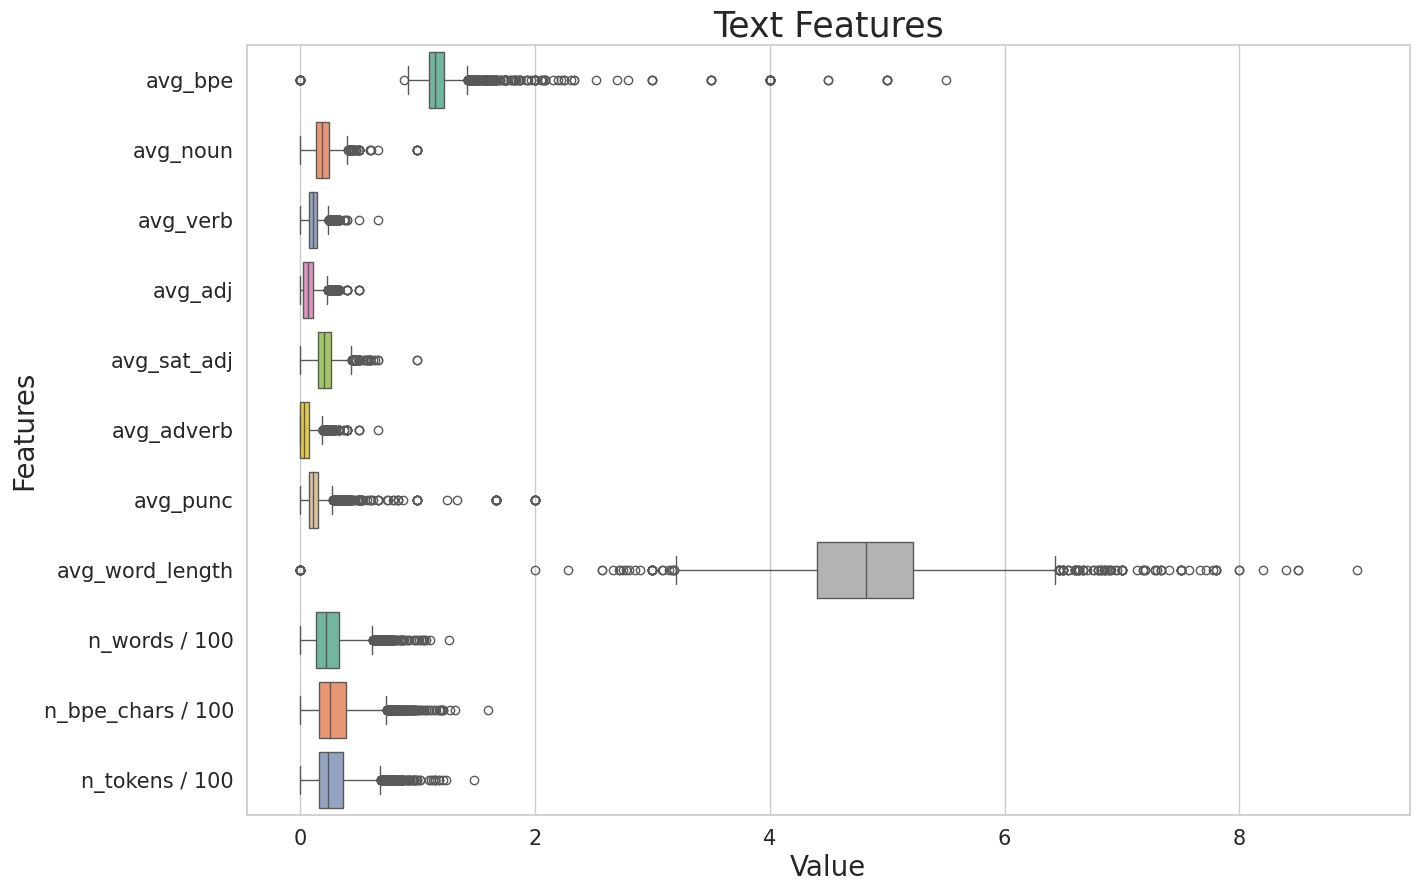

In [59]:
# normalize count features (starting with "n_") / 100
box_data = df_no_bow.copy()
for col in df_no_bow.columns:
    if 'n_' in col:
        new_col = col + ' / 100'
        box_data[new_col] = box_data[col] / 100
        box_data.drop(col, axis=1, inplace=True)

# plot boxplot
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=box_data, orient="h", palette="Set2")
plt.xlabel('Value', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Text Features', fontsize=25)
plt.show()


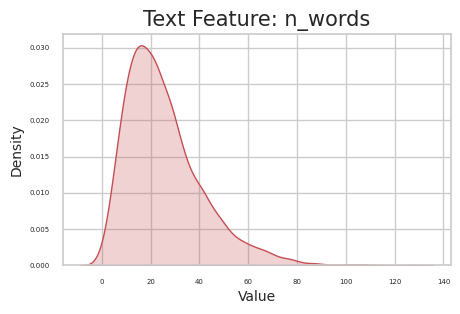

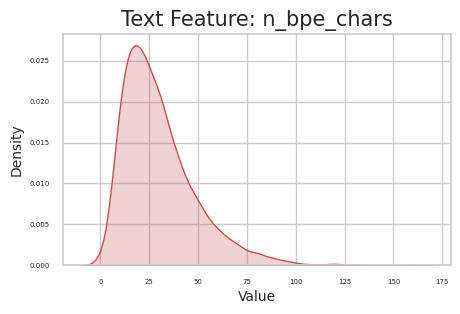

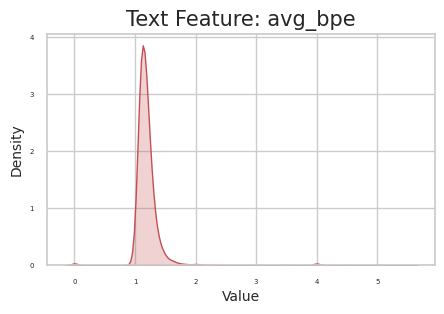

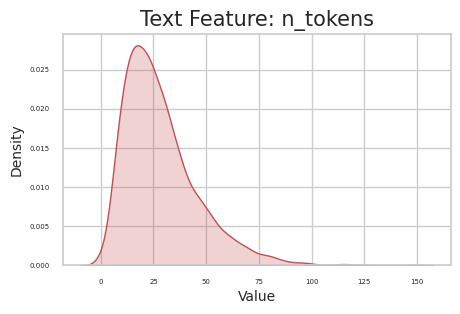

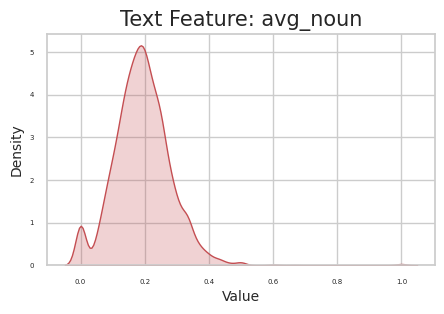

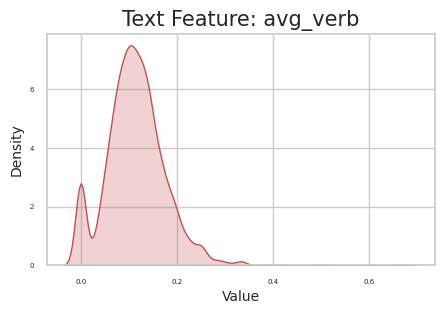

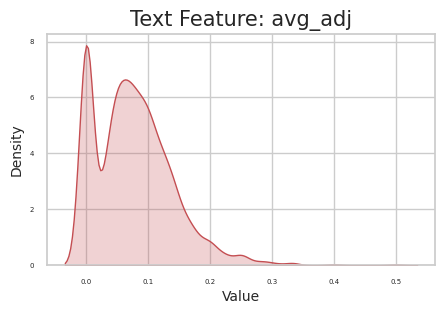

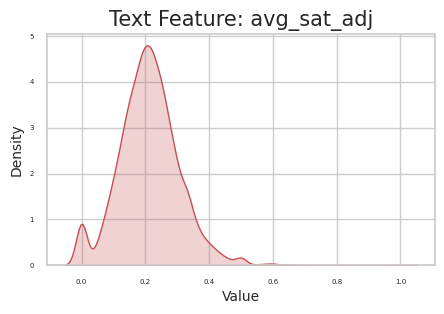

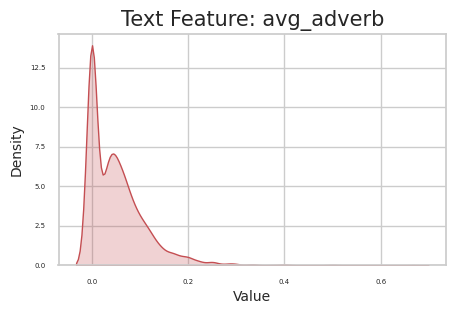

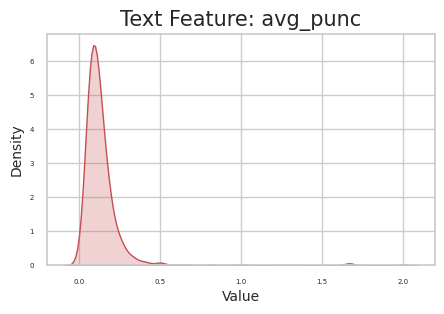

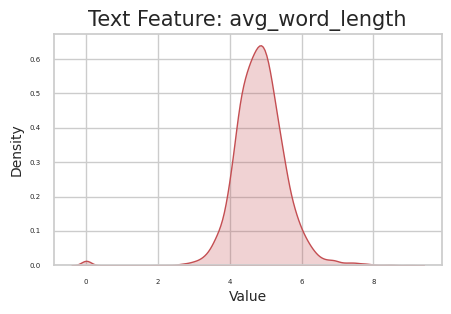

In [60]:
# kde for each feature
for col in df_no_bow.columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 3))
    ax = sns.kdeplot(df_no_bow[col], fill=True, color="r")
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.title('Text Feature: '+col, fontsize=15)
    plt.show()


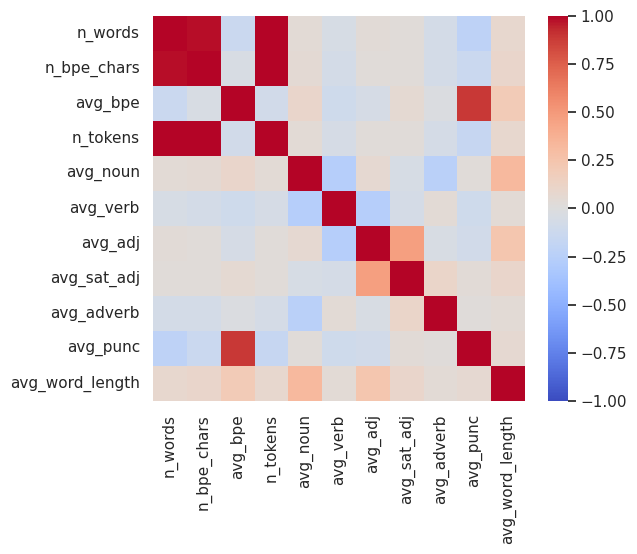

In [61]:
# correlation matrix
corr = df_no_bow.corr(method='pearson')
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix', fontsize=25)
plt.savefig('text_corr_matrix.pdf', bbox_inches='tight')
plt.show()

In [62]:
print(get_high_correlation_features(df_no_bow))

  Kept feature Removed feature   Correl.
0      n_words     n_bpe_chars  0.983012
1      n_words        n_tokens  0.993008


In [63]:
# # chi2 on bow features
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest

# X = df[bow_cols]
# y = df['score']

# chi2score = chi2(X, y)[0]
# # select 1500 features with highest chi2 score
# k = 1500
# kbest = SelectKBest(chi2, k=k).fit(X, y)
# kbest_cols = kbest.get_support(indices=True)
# kbest_scores = kbest.scores_[kbest_cols]
# kbest_features = X.columns[kbest_cols]
# kbest_df = pd.DataFrame({'feature': kbest_features, 'score': kbest_scores})
# kbest_df.sort_values('score', ascending=False, inplace=True)
# kbest_df.head(10)
